# Patent analysis for EV

- set 1 is fuel cell
- set 2 is electric vehicle
- set 4 is internal combustion
- set 8 is hybrid

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
import pandas as pd
import nltk

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Loading pickle/csv file from cleaned firm dataset(file :1)

In [5]:
import pickle
#Loading from firm cleaned file
#patent = pd.read_pickle('patent_firm_full_clean.pkl')
#patent.shape

##### for csv

In [6]:
patent=pd.read_csv('patent_firm_full_clean.csv')
patent.shape

(68764, 36)

In [7]:
patent.head()

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,US5208526A\r\nEP0557287A4\r\nUS5349535A\r\nUS5...,US63645090A\r\nEP91915464A\r\nUS96399792A\r\nU...,52393850\r\n16916549\r\n54353461\r\n48212422\r...,27071024\r\n1239277\r\n25508001\r\n22545199\r\...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd
2,2,EP96927918A,17205496,1341188,4,0,0,JP4059995A,1995-02-28,1998-08-12,...,EP1167708A2\r\nDE10029978A1\r\nDE10105233A1\r\...,EP01115227A\r\nDE10029978A\r\nDE10105233A\r\nE...,15814252\r\n12936842\r\n12970055\r\n57178895,7646156\r\n7646156\r\n7672964\r\n40580359,31,"SUMITOMO ELECTRIC INDUSTRIES, LTD.","SUMITOMO ELECTRIC INDUSTRIES, LTD.",PARTICULATE TRAP FOR A DIESEL ENGINE,An object is to provide a particulate trap for...,sumitomo electric industries ltd
3,3,JP4059995A,27121457,1341188,4,1,0,JP4059995A,1995-02-28,1996-09-10,...,KR20100103462A\r\nJP2011502743A\r\nJP201307876...,KR20107010572A\r\nJP2010531202A\r\nJP201227948...,328440678\r\n332201837\r\n406999716\r\n3782129...,40580359\r\n40580359\r\n40580359\r\n40580359\r...,31,SUMITOMO ELECTRIC IND LTD,SUMITOMO ELECTRIC IND LTD,PARTICULATE TRAP FOR DIESEL ENGINE,PURPOSE: To obtain a trap by which the leakage...,sumitomo electric ind ltd
4,4,WO9602405W,30070806,1341188,4,0,0,JP4059995A,1995-02-28,1998-03-05,...,NaN,NaN,NaN,NaN,31,"Sumitomo Electric Industries, Ltd.","Sumitomo Electric Industries, Ltd.",PARTICULATE TRAP FOR A DIESEL ENGINE,A particulate trap for a diesel engine designe...,sumitomo electric industries ltd


In [11]:
#patent['assignee'].value_counts()[:40]

**assignee is cleaned firm file**

- appln                     The identifier of the application (with letter at the end, seems Google omits that)
- appln_id                  The (internal) patstat identifier of the application
- family_id                 The (internal) patstat identifier of the family that the application is a member of sets  - sets                      Indicate which sets (fuel-cell = 1, electric  vehicle = 2, both = 3) was matched
- direct                    Indicate whether this application was found directly (title/abstract/cpc/ipc) or      indirectly (family association)
- granted                   Whether or not the application was granted
- earliest_appln            Per family, the earliest application
- earliest_filing_date      The date of the family's earliest application
- publn                     Identifiers of publications associated with this application (*)
- publn_date                The dates of associated publications (*)
- publn_first_grant         Indicates for each publication if its the first one with granted status
- num_cpc_class             The number of CPC classes for this application
- cpc_class                 The CPC class symbols for this application
- num_ipc_class             The number of IPC classes for this application
- ipc_class                 The IPC class symbols for this application
- num_cited_publn           The number of forward citations (this applications refers to other publications)
- cited_publn_date          The dates of cited publications (**)
- cited_publn               The identifiers of cited publications (**)
- cited_appln               The identifiers of the applications  associated with cited publications (**)
- cited_appln_id            The (internal) patstat identifiers of the  applications associated with cited publications (**)
- cited_family_id           The (internal) patstat identifiers of the  family associated with cited publications (**)
- num_cited_family          The total number of distinct families  associated with cited publications (***)
- num_citing_publn          The number of backward citations (other  publications refer to this application)
- citing_publn_date         The dates of citing publications (**)
- citing_publn              The identifiers of citing publications (**)
- citing_appln              The identifiers of the applications  associated with citing publications (**)
- citing_appln_id           The (internal) patstat identifiers of the  applications associated with citing publications (**)
- citing_family_id          The (internal) patstat identifiers of the  family associated with citing publications (**)
- num_citing_family         The total number of distinct families  associated with citing publications (***)
- earliest_applt            The name of the (first) applicant of the  earliest publication of this application 
- current_applt             The name of the (first) applicant of the most recent publication of this application
- appln_title               The title of this application
- assignee                  Cleaning and preprocessed firm titles (^)
>>
>> (*/**) These are one per line, in consistent order


>> (***) These seem to be the numbers that google uses to count citations. You can get this from the export if you aggregate all applications within a family and discard duplicates.

>> (^) This column is taken from previous file i.e File1-Firm_Preprocessing




# 1) Exploring data

### 1.1)-Types of features in our dataset

In [12]:
patent.dtypes.value_counts()

object    24
int64     12
dtype: int64

In [13]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(patent)
table_dtype

,Data Type
Unnamed: 0,int64
num_citing_family,int64
num_citing_publn,int64
num_cited_family,int64
num_ipc_class,int64
num_cpc_class,int64
num_cited_publn,int64
direct,int64
sets,int64
appln_id,int64


### 1.2)-Checking missing values

In [14]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [15]:
missing_values = find_missing_values(patent, columns=patent.columns)
missing_values

Number of missing or NaN values for each column:


{'Unnamed: 0': 0,
 'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'publn_claims': 0,
 'num_cpc_class': 0,
 'cpc_class': 6336,
 'num_ipc_class': 0,
 'ipc_class': 60,
 'num_cited_publn': 0,
 'cited_publn_date': 22319,
 'cited_publn': 22319,
 'cited_appln': 22319,
 'cited_appln_id': 22319,
 'cited_family_id': 22319,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 24950,
 'citing_publn': 24950,
 'citing_appln': 24950,
 'citing_appln_id': 24950,
 'citing_family_id': 24950,
 'num_citing_family': 0,
 'earliest_applt': 508,
 'current_applt': 508,
 'appln_title': 0,
 'appln_abstr': 0,
 'assignee': 508}

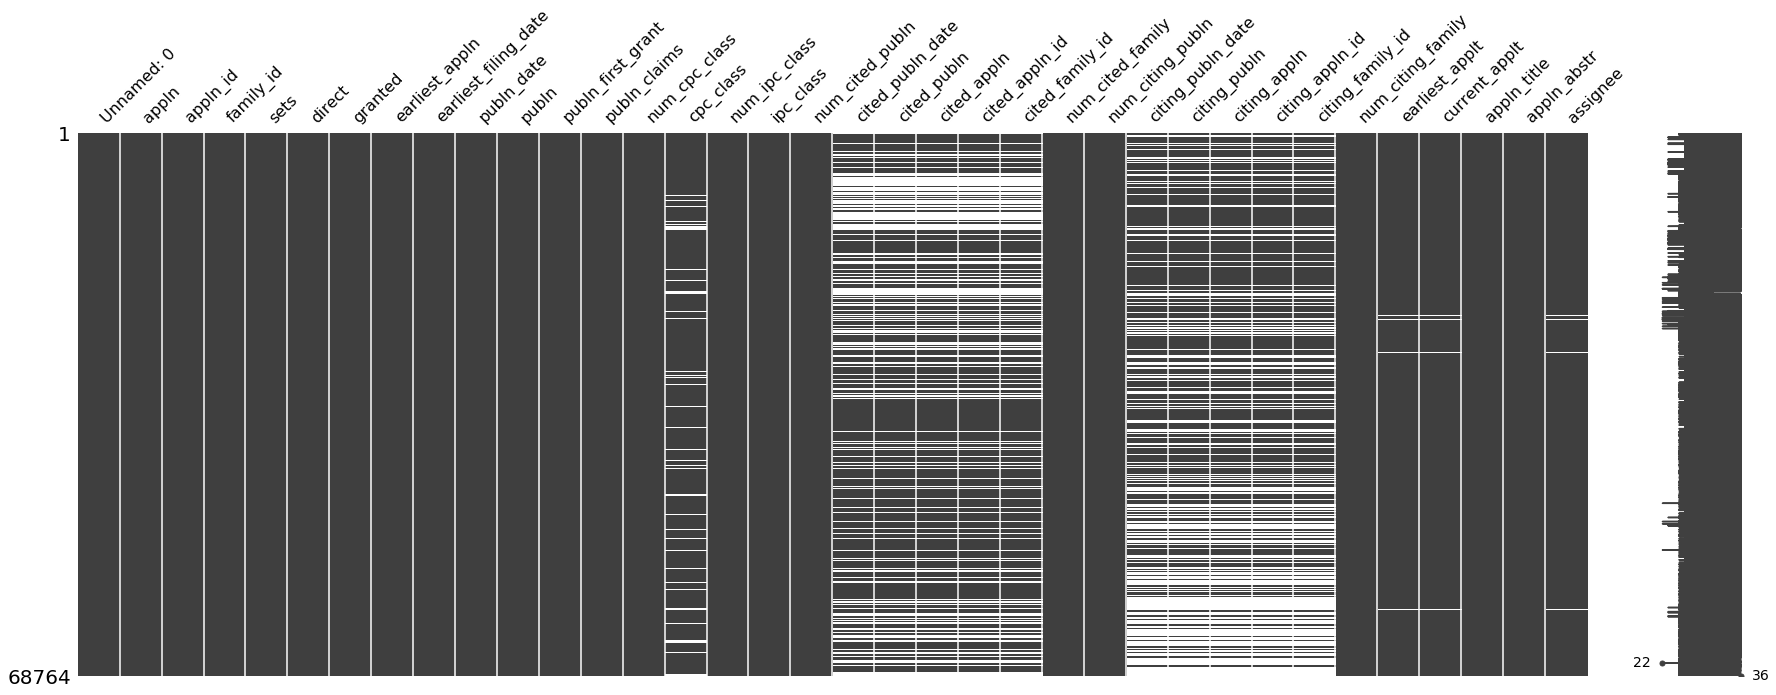

In [16]:
import missingno
missingno.matrix(patent, figsize = (30,10))

In [17]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(patent)

No. of fields:  68764
No. of missing fields:  15


,No. of mising Value,%age of missing Value
citing_family_id,24950,36.3
citing_appln_id,24950,36.3
citing_appln,24950,36.3
citing_publn,24950,36.3
citing_publn_date,24950,36.3
cited_publn_date,22319,32.5
cited_family_id,22319,32.5
cited_appln_id,22319,32.5
cited_appln,22319,32.5
cited_publn,22319,32.5


In [18]:
patent.sets.value_counts()

4     29749
2     16968
8     12825
1      5877
10     1867
12     1095
3       160
14      112
9        49
5        26
6        20
11       16
Name: sets, dtype: int64

- set 1 is fuel cell and contains 4411 values
- set 2 is electric vehicle and contains 16947 values
- set 4 is internal combustion and contains 1900 values
- set 8 is hybrid and contains 8048 values

### 1.3)- Duplicate values

In [19]:
patent_abst=patent['appln_abstr']

In [20]:
#patent.appln_abstr.duplicated()
patent_abst.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
68734    False
68735    False
68736    False
68737    False
68738    False
68739    False
68740    False
68741    False
68742    False
68743    False
68744    False
68745    False
68746    False
68747    False
68748    False
68749    False
68750    False
68751    False
68752    False
68753    False
68754    False
68755     True
68756    False
68757    False
68758     True
68759    False
68760    False
68761    False
68762    False
68763    False
Name: appln_abstr, Length: 68764, dtype: bool

In [21]:
patent_abst.duplicated().sum()

8439

In [22]:
#patent.loc[patent.appln_abstr.duplicated
patent_abst.loc[patent_abst.duplicated()]

81       An IC engine fuel supply system (10) having a ...
82       An IC engine fuel supply system (10) having a ...
85       A method of controlling the idle speed of an e...
96       A method of controlling the engine speed of an...
98       A method for the release of energy in storage ...
103      A method for the thermal management of a fuel ...
104      A method for the thermal management of a fuel ...
144      An energy distribution network for providing h...
147      An energy distribution network for providing h...
148      An energy distribution network for providing h...
153      A hydrogen fuel supply system includes a hydro...
154      A hydrogen fuel supply system includes a hydro...
155      A hydrogen fuel supply system includes a hydro...
156      An energy distribution network for providing h...
168      The system includes a permanent magnet three-p...
574      A filter for fuel and/or lubricants of an inte...
587      A mounting arrangement is provided for mountin.

In [23]:
# mark duplicates as true except 1st occurance.So, all 1st values are keep and all others are identified as duplicates.
#We can change as 'last'
patent.loc[patent.appln_abstr.duplicated(keep= False), :]

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee
80,80,WO9500239W,2445651,3779821,4,0,1,AUPM524494A,1994-04-26,1995-11-02,...,WO03056165A1\r\nUS6935283B2,WO0300005W\r\nUS33661303A,1397792\r\n49716371,3833444\r\n3833444,6,"GLEW, WAYNE, KENNETH","GLEW, WAYNE, KENNETH",IC ENGINE FUEL SUPPLY SYSTEM,An IC engine fuel supply system (10) having a ...,glew wayne kenneth
81,81,CA2188753A,4539165,3779821,4,0,1,AUPM524494A,1994-04-26,1995-11-02\r\n2004-02-24,...,NaN,NaN,NaN,NaN,6,"GLEW, WAYNE KENNETH","GLEW, WAYNE KENNETH",IC ENGINE FUEL SUPPLY SYSTEM,An IC engine fuel supply system (10) having a ...,glew wayne kenneth
82,82,MX9605159A,41260817,3779821,4,0,1,AUPM524494A,1994-04-26,1997-08-30,...,NaN,NaN,NaN,NaN,6,WAYNE KENNETH GLEW,WAYNE KENNETH GLEW,IC ENGINE FUEL SUPPLY SYSTEM.,An IC engine fuel supply system (10) having a ...,wayne kenneth glew
84,84,WO9500391W,2445801,3781150,4,1,0,AUPM658294A,1994-06-29,1996-01-11,...,GB2313422A\r\nFR2748971A1\r\nWO9813616A1\r\nEP...,GB9710509A\r\nFR9706161A\r\nWO9702145W\r\nEP96...,23222492\r\n20553236\r\n11705703\r\n17161136\r...,7795313\r\n7795313\r\n7806816\r\n7769940\r\n78...,61,ORBITAL ENGINE COMPANY (AUSTRALIA) PTY. LIMITED,ORBITAL ENGINE COMPANY (AUSTRALIA) PTY. LIMITED,IDLE SPEED CONTROL FOR INTERNAL COMBUSTION ENG...,A method of controlling the idle speed of an e...,orbital engine company (australia) pty limited
85,85,GB9626141A,23207465,3781150,4,1,1,AUPM658294A,1994-06-29,1997-02-05\r\n1997-03-05\r\n1999-01-27,...,NaN,NaN,NaN,NaN,61,ORBITAL ENGINE COMPANY,ORBITAL ENGINE COMPANY,Idle speed control for internal combustion eng...,A method of controlling the idle speed of an e...,orbital engine company
95,95,TW89127745A,45085169,3819038,4,1,1,AUPQ489999A,1999-12-24,2002-12-11,...,NaN,NaN,NaN,NaN,15,ORBITAL ENGINE COMPANY (AUSTRALIA) PROPRIETARY...,ORBITAL ENGINE COMPANY (AUSTRALIA) PROPRIETARY...,Methods of controlling the speed of an interna...,A method of controlling the engine speed of an...,orbital engine company (australia) proprietary...
96,96,US11023402A,47647147,3819038,4,0,1,AUPQ489999A,1999-12-24,2002-10-24\r\n2004-06-29,...,US6688281B1\r\nUS2004242091A1\r\nUS6884128B2\r...,US80651901A\r\nUS69175403A\r\nUS69175403A\r\nU...,53564076\r\n52795745\r\n52795745\r\n54199033\r...,3815149\r\n32454219\r\n32454219\r\n35941265\r\...,15,Orbital Engine Company (Australia) Pty Limited,Orbital Engine Company (Australia) Pty Limited,Speed limiter,A method of controlling the engine speed of an...,orbital engine company (australia) pty limited
97,97,CA2436247A,4809435,3825741,8,1,0,AUPR170400A,2000-11-28,2002-06-13,...,NaN,NaN,NaN,NaN,24,IFIELD TECHNOLOGY LIMITED,IFIELD TECHNOLOGY LIMITED,EMERGENCY ENERGY RELEASE FOR HYDRAULIC ENERGY ...,A method for the release of energy in storage ...,ifield technology limited
98,98,WO0102784W,24008790,3825741,8,1,0,AUPR170400A,2000-11-28,2002-06-13\r\n2003-04-10,...,US7364409B2\r\nUS7380490B2\r\nUS7402027B2\r\nU...,US77677004A\r\nUS77677204A\r\nUS77676904A\r\nU...,53388596\r\n53388606\r\n53388590\r\n58074050\r...,34827441\r\n34827443\r\n34827440\r\n36565756\r...,24,IFIELD TECHNOLOGY LTD.,IFIELD TECHNOLOGY LTD.,EMERGENCY ENERGY RELEASE FOR HYDRAULIC ENERGY ...,A method for the release of energy in storage ...,ifield technology ltd
102,102,WO0300609W,1398375,3836014,1,1,0,AUPS244802A,2002-05-21,2003-11-27,...,DE102005054713A1\r\nJP2006261025A\r\nEP1416566...,DE102005054713A\r\nJP2005079294A\r\nEP03021068...,15010937\r\n38857048\r\n16008347\r\n39634306\r...,36390110\r\n37100009\r\n32086889\r\n32011639\r...,37,Ceramic Fuel Cells Limited,Ceramic Fuel Cells Limited,FUEL CELL SYSTEM,A method for the thermal management of a fuel ...,ceramic fuel cells limited


### 1.4) checking duplicate value for text i.e abstract and title (combination)

In [24]:
patent.duplicated(subset=['appln_abstr','appln_title']).sum()

3420

Clearly, there is a decrease from 8439 when we only used abstract to 3420 when we added title as well.

In [25]:
patent.duplicated(subset=['appln_abstr','appln']).sum()

0

In [26]:
patent.duplicated(subset=['appln_title','appln']).sum()

0

### To drop duplicate values

patent.appln_abstr.drop_duplicates(keep='first')<br>
patent.shape

If we want to drop duplicate values from both abstract and title then

patent.drop_duplicates(subset=['appln_abstr','appln_title']) <br>
patent.shape

# 2) Comparing groups

In [27]:
patent['granted'][:5]

0    1
1    1
2    0
3    0
4    0
Name: granted, dtype: int64

In [28]:
patent['granted'].value_counts()

1    52447
0    16317
Name: granted, dtype: int64

In [29]:
patent['current_applt'].value_counts()

TOYOTA MOTOR CORP                                    3602
Toyota Jidosha Kabushiki Kaisha                      2992
Robert Bosch GmbH                                    2508
Hyundai Motor Company                                2228
HONDA MOTOR CO LTD                                   1903
NISSAN MOTOR CO LTD                                  1374
Ford Global Technologies, LLC                        1190
Nissan Motor Co., Ltd.                                818
Honda Motor Co., Ltd.                                 782
Honda Giken Kogyo Kabushiki Kaisha                    611
DENSO CORP                                            603
Peugeot Citroen Automobiles SA                        595
TOYOTA JIDOSHA KABUSHIKI KAISHA                       551
Toyota Motor Corporation                              474
MITSUBISHI MOTORS CORP                                457
HONDA MOTOR CO., LTD.                                 407
Hitachi, Ltd.                                         351
DaimlerChrysle

**We have a cleaned column with all firms pre-processed data so, lets use that**

In [30]:
p=patent
p['assignee'].value_counts()[:20]

toyota motor corp               8125
honda motor co ltd              3977
nissan motor co ltd             2885
bosch corp                      2770
hyundai motor co ltd            2597
ford global technologies inc    1813
mitsubishi motors corp          1412
denso corp                      1097
renault sas                      859
hitachi ltd                      759
peugeot citroen automobiles      688
suzuki motor corp                528
daimlerchrysler ag               503
general motors corporation       475
yamaha motor co ltd              466
aisin aw co ltd                  458
volkswagen group                 375
continental automotive gmbh      316
isuzu motors ltd                 300
siemens aktiengesellschaft       285
Name: assignee, dtype: int64

In [31]:
# suppose we want to see how many patents are granted to Hyundai Motor Company 

p[p.assignee == 'hyundai motor co ltd'].granted.value_counts()

1    2003
0     594
Name: granted, dtype: int64

In [32]:
p[p.assignee =='toyota motor corp'].granted.value_counts()

1    6162
0    1963
Name: granted, dtype: int64

In [33]:
# if we wanna see %age
p[p.assignee =='toyota motor corp'].granted.value_counts(normalize=True)

1    0.7584
0    0.2416
Name: granted, dtype: float64

In [34]:
# Use groupby
p.groupby('granted').assignee.value_counts(normalize=True)

granted  assignee                                                                                                          
0        toyota motor corp                                                                                                     0.121503
         bosch corp                                                                                                            0.058802
         hyundai motor co ltd                                                                                                  0.036767
         nissan motor co ltd                                                                                                   0.036086
         honda motor co ltd                                                                                                    0.034229
         ford global technologies inc                                                                                          0.026801
         renault sas                                        

# 3)- Working with time series


- Remove 2018 
- Check which year has least and most patents granted <br>
- earliest_filing_date= no. of patents' application

In [35]:
filling_date= patent.earliest_filing_date

In [36]:
dtype(filling_date)

dtype('O')

It's an object. We need to convert into datetime object

In [37]:
patent['application_date']= pd.to_datetime(filling_date)

In [38]:
dtype(patent.application_date)

dtype('<M8[ns]')

Now we have it. Let's see what it contains

In [39]:
patent.application_date[:5]

0   1990-07-19
1   1990-07-19
2   1995-02-28
3   1995-02-28
4   1995-02-28
Name: application_date, dtype: datetime64[ns]

We only are interested in year. No need for date, weeks or months for now.

In [40]:
patent.application_date.dt.year

0        1990
1        1990
2        1995
3        1995
4        1995
5        1995
6        2000
7        2000
8        1998
9        1998
10       1993
11       2000
12       2000
13       2000
14       2000
15       2000
16       2000
17       2002
18       2002
19       1998
20       1998
21       2000
22       2002
23       2002
24       2002
25       1990
26       1994
27       2000
28       2000
29       2000
         ... 
68734    2017
68735    2017
68736    2017
68737    2017
68738    2017
68739    2017
68740    2016
68741    2016
68742    2016
68743    2016
68744    2005
68745    2005
68746    2005
68747    2014
68748    2017
68749    2016
68750    2014
68751    2014
68752    2014
68753    2016
68754    2016
68755    2016
68756    2016
68757    2016
68758    2016
68759    2017
68760    2017
68761    2017
68762    2015
68763    2017
Name: application_date, Length: 68764, dtype: int64

### 3.1 )-Removing 2018 from dataset

 **check how many patents 2018 year has **

In [41]:
patent[patent.application_date.dt.year== 2018]

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date
68534,68534,AU2018100117A,490768723,61249370,4,1,1,AU2018100117A,2018-01-26,2018-03-01,...,NaN,NaN,NaN,0,ECODRIVE SOLUTIONS LIMITED,ECODRIVE SOLUTIONS LIMITED,IMPROVED OPPOSED-PISTON INTERNAL COMBUSTION EN...,An improved engine directed to a Low friction ...,ecodrive solutions limited,2018-01-26
68659,68659,KR20180006209A,492385235,61688642,2,1,1,KR20180006209A,2018-01-17,2018-03-07,...,NaN,NaN,NaN,0,"KANG, IN SU","KANG, IN SU",AUTONOMOUS ELECTRIC VEHICLE,The present invention relates to an autonomous...,kang in su,2018-01-17


In [42]:
# Remove only two rows with year 2018
patent.drop([68534,68659], axis=0, inplace=True)

In [43]:
patent[patent.application_date.dt.year== 2018]

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date


In [48]:
patent.shape

(68762, 38)

**From 68764, we have now 68762**

In [45]:
patent['year']=patent['application_date'].dt.year

In [46]:
patent.year[:5]

0    1990
1    1990
2    1995
3    1995
4    1995
Name: year, dtype: int64

In [47]:
patent.year.value_counts().sort_index()

1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
Name: year, dtype: int64

In [49]:
patent.year.value_counts(ascending=True)

2017     360
1990     631
1991     732
1992    1008
1994    1154
1993    1205
1995    1285
1996    1483
2016    1568
1997    1581
1998    1726
1999    2003
2000    2211
2002    2219
2001    2267
2004    2310
2003    2431
2005    2641
2015    2687
2008    3259
2014    3420
2007    3444
2006    3498
2009    3754
2013    4247
2010    4659
2012    5242
2011    5737
Name: year, dtype: int64

In [50]:
#We can even pick least patent year
patent.year.value_counts().sort_values().index[0]

2017

In [51]:
# For highest year
patent.year.value_counts().index[0]

2011

### Alternative method

In [52]:
patent.earliest_filing_date.str.slice(0,4)

0        1990
1        1990
2        1995
3        1995
4        1995
5        1995
6        2000
7        2000
8        1998
9        1998
10       1993
11       2000
12       2000
13       2000
14       2000
15       2000
16       2000
17       2002
18       2002
19       1998
20       1998
21       2000
22       2002
23       2002
24       2002
25       1990
26       1994
27       2000
28       2000
29       2000
         ... 
68734    2017
68735    2017
68736    2017
68737    2017
68738    2017
68739    2017
68740    2016
68741    2016
68742    2016
68743    2016
68744    2005
68745    2005
68746    2005
68747    2014
68748    2017
68749    2016
68750    2014
68751    2014
68752    2014
68753    2016
68754    2016
68755    2016
68756    2016
68757    2016
68758    2016
68759    2017
68760    2017
68761    2017
68762    2015
68763    2017
Name: earliest_filing_date, Length: 68762, dtype: object

In [53]:
patent.earliest_filing_date.str.slice(0,4).value_counts()

2011    5737
2012    5242
2010    4659
2013    4247
2009    3754
2006    3498
2007    3444
2014    3420
2008    3259
2015    2687
2005    2641
2003    2431
2004    2310
2001    2267
2002    2219
2000    2211
1999    2003
1998    1726
1997    1581
2016    1568
1996    1483
1995    1285
1993    1205
1994    1154
1992    1008
1991     732
1990     631
2017     360
Name: earliest_filing_date, dtype: int64

In [54]:
#We can even pick least patent year
patent.application_date.dt.year.value_counts().sort_values().index[0]

2017

In [55]:
# For highest year
patent.application_date.dt.year.value_counts().index[0]

2011

### saving as pickle

In [56]:
patent.to_pickle('eda.pkl')

In [57]:
load = pd.read_pickle('eda.pkl')
load.shape

(68762, 38)

In [58]:
patent.to_csv('eda.csv')

**We have added two new columns i.e application_date and year**

### Plotting is not part of this notebook

# 4 Text Mining

In [ ]:
patent_abst=patent['appln_abstr']

In [ ]:
chars = list(set(patent_abst)) 
data_size, vocab_size = len(patent_abst), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

**still there are alot of unique letters. Seems like patents do use key words alot**